In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
import plotly.graph_objects as go

In [3]:
df = pd.read_csv('data/combined.csv')

fig = go.Figure()
for year in df['Year'].unique():
    df_year = df[(df['Year'] == year) & (df['Age'] == 'gesamt')]
    fig.add_trace(go.Scatter(
        x=df_year['Week'],
        y=df_year['Value'],
        mode='lines',
        name=f'Jahr {year}'
    ))

# Layout anpassen
fig.update_layout(
    title='Aggregierte wöchentliche Werte',
    xaxis_title='Kalenderwoche',
    yaxis_title='Wert',
    legend_title='Jahr',
    template='plotly_white'
)

# Diagramm anzeigen
fig.show()

In [4]:
fig = go.Figure()
df_gesamt = df[df['Age'] == 'gesamt']
df_gesamt['Date'] = pd.to_datetime(df_gesamt['Year'].astype(str) + df_gesamt['Week'].astype(str).str.zfill(2) + '1', format='%Y%W%w')
df_gesamt= df_gesamt.drop(columns=['Year','Week','Age'])


fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Value'],
    mode='lines',
    name='Tode'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Value_Covid'],
    mode='lines',
    name='Covid Tode'
))

# Layout anpassen
fig.update_layout(
    title='Vergleich Tode',
    xaxis_title='Datum',
    yaxis_title='Tode',
    legend_title='Jahr',
    template='plotly_white'
)

# Diagramm anzeigen
fig.show()


/tmp/ipykernel_10362/3884921462.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [5]:
df = pd.read_csv('data/combined.csv')
df_gesamt = df[df['Age'] == 'gesamt']
fig = go.Figure()
df_gesamt = df[df['Age'] == 'gesamt']
df_gesamt['Date'] = pd.to_datetime(df_gesamt['Year'].astype(str) + df_gesamt['Week'].astype(str).str.zfill(2) + '1', format='%Y%W%w')
df_gesamt= df_gesamt.drop(columns=['Year','Week','Age'])


fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Value']/10,
    mode='lines',
    name='Tode'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Value_Covid'],
    mode='lines',
    name='Covid Tode'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Cases']/1000,
    mode='lines',
    name='Covid Fälle'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Hospi_Cases']/10,
    mode='lines',
    name='Covid Hospitalisierungen'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Erstimpfung']/1000,
    mode='lines',
    name='Erstimpfung'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Zweitimpfung']/1000,
    mode='lines',
    name='Zweitimpfung'
))
fig.add_trace(go.Scatter(
    x=df_gesamt['Date'],
    y=df_gesamt['Booster']/1000,
    mode='lines',
    name='Booster'
))

# Layout anpassen
fig.update_layout(
    title='Vergleich Metriken',
    xaxis_title='Datum',
    yaxis_title='Metriken',
    legend_title='Jahr',
    template='plotly_white'
)

# Diagramm anzeigen
fig.show()

/tmp/ipykernel_10362/1219675884.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



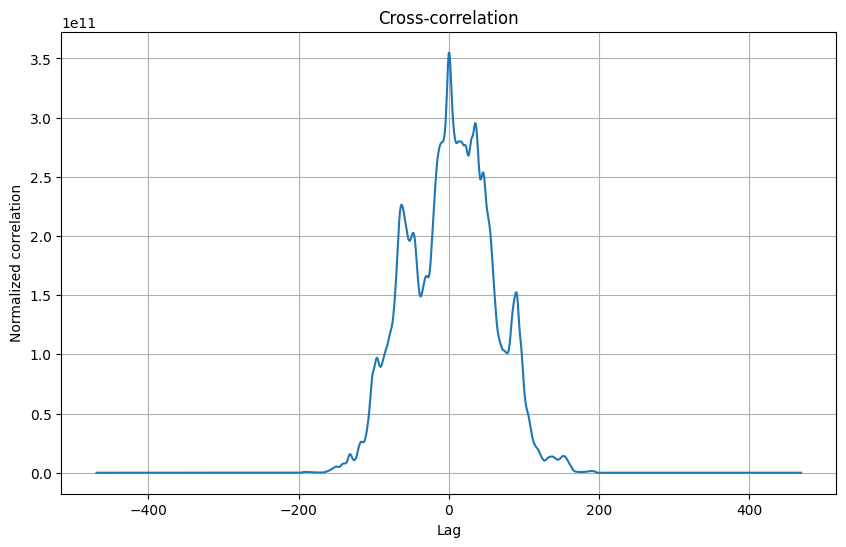

In [6]:

def crosscorr(x, y):
    correlation = []
    for lag in range(-50, 51):
        x_lagged = x.shift(lag)
        correlation.append(np.corrcoef(x_lagged.values, y.values)[0, 1])
    return pd.Series(correlation, index=range(-50, 51))


first_series = 'Hospi_Cases'
second_series = 'Cases'
pol = pd.read_csv('data/Policy.csv')
df = pd.read_csv('data/combined.csv')
df = df.query('Age == "gesamt"')
df.set_index(['Year','Week','Age'],inplace=True)
correlation = correlate(df[first_series], df[second_series], mode='full')
#correlation = crosscorr(df[first_series], df[second_series])
#print(correlation)
normalized_correlation = correlation #/ np.sqrt(correlate(df[first_series], df[first_series], mode='full') * correlate(df[second_series], df[second_series], mode='full'))
lags = np.arange(-len(df.index)+1, len(df.index))

cc_df = pd.DataFrame({'lag': lags, 'normalized_correlation': normalized_correlation})

plt.figure(figsize=(10, 6))
plt.plot(cc_df['lag'], cc_df['normalized_correlation'])
plt.title('Cross-correlation')
plt.xlabel('Lag')
plt.ylabel('Normalized correlation')
plt.grid(True)
plt.show()